For more information see kepstr.blogspot.com

As a precaution

In [30]:
import numpy as np

np.random.seed(42)

In [24]:
import numpy as np
import scipy as sp
from pygsp import *
import matplotlib.pyplot as plt
import time 

#we can optimize this, because laplacian  -> eigv, and after multiply diagonal matrices

max_set = 6 
def get_smallest_eigenvalue(new_graph):
    new_graph.compute_fourier_basis()
    
    return (new_graph.e[new_graph.N])


def compute_not_S(N, S):
    not_S = []
    for i in range(0, N):
        if (i not in S):
            not_S.append(i)
            
    return not_S

def compute_L(L, k):
    new_L = L
    for i in range(1, k):
        new_L = L @ new_L

    return new_L 
   
def estimate_cut_off(graph, m, k):
    S = []
    w = []
    graph.compute_laplacian("normalized")
    graph.L = (1/2)*(graph.L + graph.L.T)
    L = compute_L(graph.L, k)
    while(len(S) < m):
        proj = (np.delete(np.delete(L.todense(), S, 0), S, 1))
        eig_val, U = np.linalg.eig(proj)
        small_index = np.argmin(abs(eig_val))
        min_eigv = min(abs(eig_val))
        w.append(np.power(abs(eig_val[small_index]), 1/k))
        minimizer = U[:, small_index]
        v = np.argmax(abs(minimizer))
        not_S = compute_not_S(graph.N, S)
        if (v in not_S):
            S.append(not_S[v])

    return S, w, U[:, 0]


def compute_k(eig_val, cut_off):
    k = 0
    for i in range(0, len(eig_val)):
        if (cut_off > eig_val[k]):
            k += 1
        else:
            break
    
    return k


def give_all_signal(graph, S, signal_S, cut_off):
    
    print("CUT_OFF", cut_off)
    k = compute_k(graph.e, cut_off)
    U_k = graph.U[:, range(0, k)]
    U_k_not_S = U_k[compute_not_S(graph.N, S), :]
    U_K_S = U_k[S, :]
    new_f1 = U_k_not_S @ np.linalg.inv(U_K_S.T @ U_K_S) @ U_K_S.T @ signal_S
    new_f = U_k_not_S @ np.linalg.pinv(U_K_S) @ signal_S
    
    return new_f1

def main(graph = 0, signal = 0, max_size_set = 5):
    max_set = max_size_set
    rs = np.random.RandomState(42)
    graph = graphs.ErdosRenyi(N = 30, p = 0.2)
    graph.compute_laplacian("normalized")
    graph.compute_fourier_basis()
    S = []
    signal =  100*(graph.U[:, 0] + graph.U[:, 1] + graph.U[:, 2]
                                   + graph.U[:, 3] + graph.U[:, 4])
    S, w, minimizer = estimate_cut_off(graph, m = max_set, k = 10)
    print("Sampling set")
    print(S)
    print("Signal on sampling set")
    print(signal[S])
    cut_off = w[max_set - 1]
    plt.plot(w)
    plt.show()
    graph.set_coordinates()
    plt.plot(graph.e)
    plt.show()
    unknown_signal= give_all_signal(graph, S, signal[S], cut_off)
    
    all_signal = np.zeros(len(signal))
    all_signal_1 = np.zeros(len(signal))
    all_signal_2 = np.zeros(len(signal))
    all_signal_1[S] = signal[S]
    
    all_signal_2[compute_not_S(len(signal), S)] = unknown_signal[range(len(signal) - len(S))]
    all_signal = all_signal_1 + all_signal_2
    graph.plot_signal(all_signal)
    graph.plot_signal(signal)
    
    return all_signal, graph

Cut-off frequency, distribution eigenvalues of Laplacian, estimated signal, and true signal

Sampling set
[12, 23, 3, 1, 29, 28]
Signal on sampling set
[-91.34928502  30.22604095  -2.76819018  45.41875257 -15.71174801
 -12.10804849]


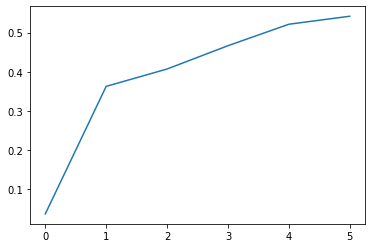

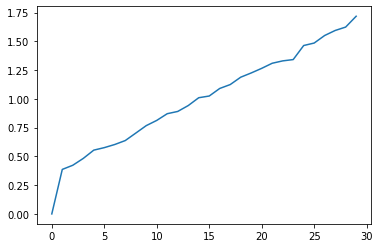

CUT_OFF 0.5416835248884201


/home/pedashenko/.local/lib/python3.8/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)
/home/pedashenko/.local/lib/python3.8/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


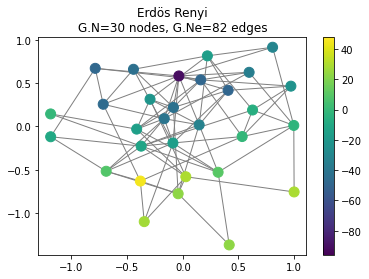

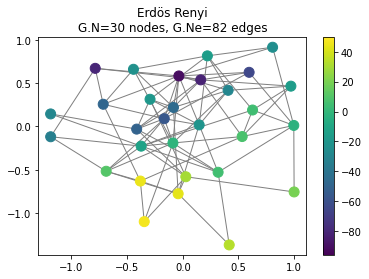

In [27]:
signal, graph = main(max_size_set = 6)

Sampling set is shown here

/home/pedashenko/.local/lib/python3.8/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


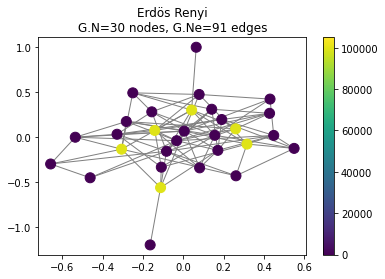

In [26]:
true_signal =  100*(graph.U[:, 0] + graph.U[:, 1] + graph.U[:, 2]
                                   + graph.U[:, 3])
tmp = true_signal
tmp[[20, 8, 27, 25, 24, 17]] = +100000
graph.plot_signal(tmp)
